**Name : Riwaj Maharjan**

**Group : L6CG19**

**Student Number : 2357551**

#  2 Getting Started with Image Processing with Python.

**2.1 Exercise- 1:**

In [1]:
from PIL import Image
import matplotlib.pyplot as plt
import numpy as np

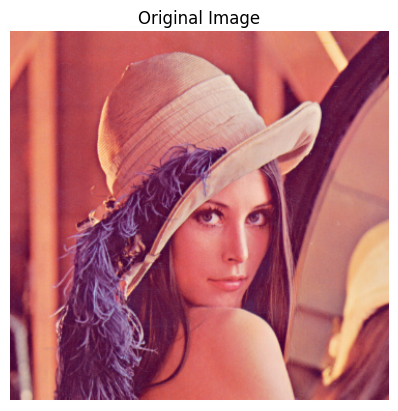

In [21]:
# 1. Read and display the image.
image = Image.open("/content/drive/MyDrive/AI and Machine Learning/lenna_image.png")
plt.imshow(image)
plt.axis('off')
plt.title('Original Image')
plt.show()

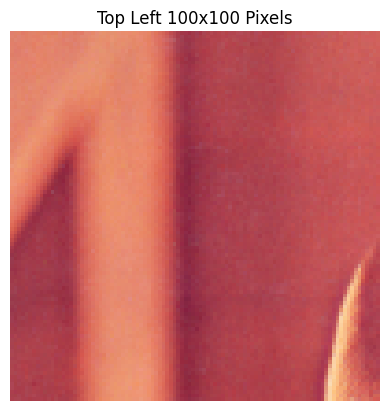

In [10]:
# 2. Display only the top left corner of 100x100 pixels
image_array = np.array(image)

top_left = image_array[:100, :100]

plt.imshow(top_left)
plt.axis('off')
plt.title('Top Left 100x100 Pixels')
plt.show()

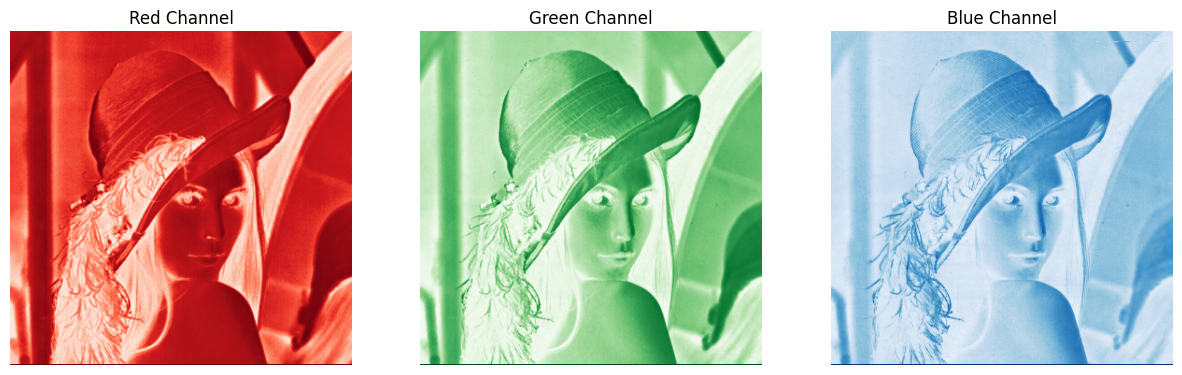

In [18]:
# 3. Show the three color channels (R, G, B).
red_channel = image_array[:, :, 0]
green_channel = image_array[:, :, 1]
blue_channel = image_array[:, :, 2]

plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
plt.imshow(red_channel, cmap='Reds')
plt.axis('off')
plt.title('Red Channel')

plt.subplot(1, 3, 2)
plt.imshow(green_channel, cmap='Greens')
plt.axis('off')
plt.title('Green Channel')

plt.subplot(1, 3, 3)
plt.imshow(blue_channel, cmap='Blues')
plt.axis('off')
plt.title('Blue Channel')

plt.show()

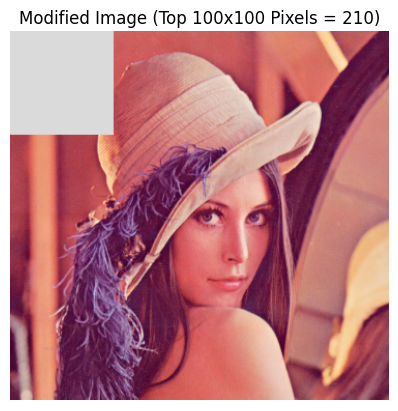

In [20]:
#4. Modify the top 100 ×100 pixels to a value of 210 and display the resulting image

modified_image = image_array.copy()
modified_image[:100, :100] = 210

plt.imshow(modified_image)
plt.axis('off')
plt.title('Modified Image (Top 100x100 Pixels = 210)')
plt.show()

**2.2 Exercise- 2:**

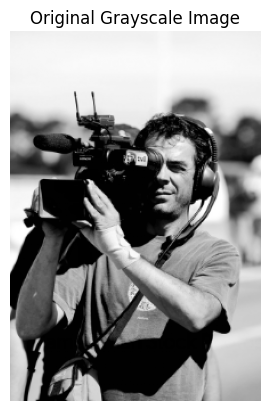

In [28]:
#1. Load and display a grayscale image.
grayscale_image = Image.open("/content/drive/MyDrive/AI and Machine Learning/camera_man.jpg").convert('L')
plt.imshow(grayscale_image, cmap='gray')
plt.axis('off')
plt.title('Original Grayscale Image')
plt.show()

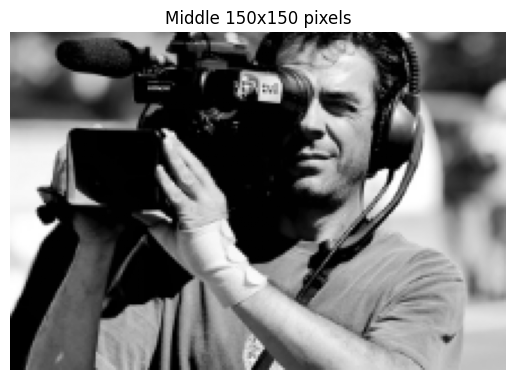

In [36]:
# 2. Extract and display the middle section of the image (150 pixels).
grayscale_array = np.array(grayscale_image)

height, width = grayscale_array.shape

start_y = (height - 150) // 2
end_y = start_y + 150

cropped_image = grayscale_array[start_y:end_y, :]

plt.imshow(cropped_image, cmap="gray")
plt.axis("off")
plt.title('Middle 150x150 pixels')
plt.show()

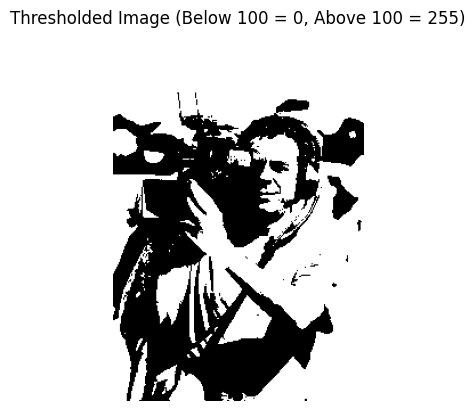

In [37]:
# 3. Apply a simple threshold to the image (e.g., set all pixel values below 100 to 0).
threshold_image = np.where(grayscale_array < 100, 0, 255)

plt.imshow(threshold_image, cmap='gray')
plt.axis('off')
plt.title('Thresholded Image (Below 100 = 0, Above 100 = 255)')
plt.show()

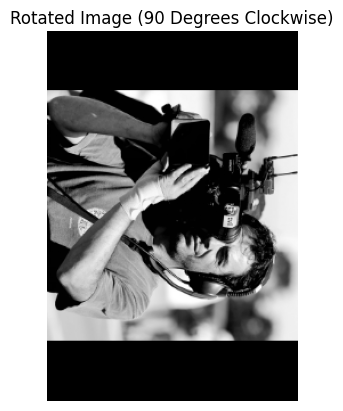

In [39]:
# 4. Rotate the image 90 degrees clockwise and display the result
rotated_image = grayscale_image.rotate(-90)

plt.imshow(rotated_image, cmap='gray')
plt.axis('off')
plt.title('Rotated Image (90 Degrees Clockwise)')
plt.show()

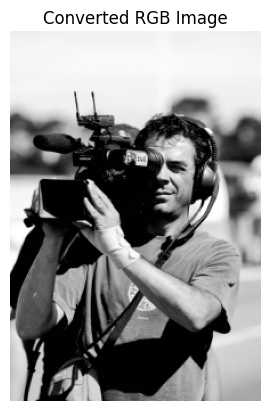

In [43]:
# 5. Convert the grayscale image to an RGB image.
rgb_image = np.stack([grayscale_array] * 3, axis=-1)

plt.imshow(rgb_image)
plt.axis('off')
plt.title('Converted RGB Image')
plt.show()

# 3 Image Compression and Decompression using PCA.

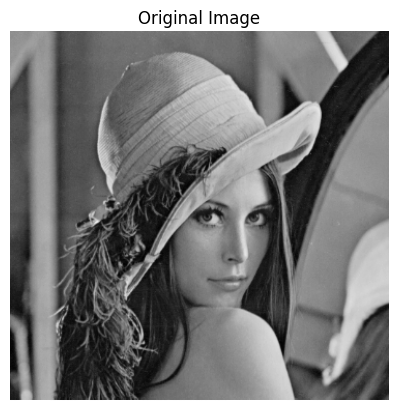

In [47]:

image = Image.open("/content/drive/MyDrive/AI and Machine Learning/lenna_image.png").convert('L')

plt.imshow(image, cmap='gray')
plt.axis('off')
plt.title('Original Image')
plt.show()

In [46]:
image_array = np.array(image)

mean = np.mean(image_array, axis=0)
std = np.std(image_array, axis=0)
image_standardized = (image_array - mean) / std

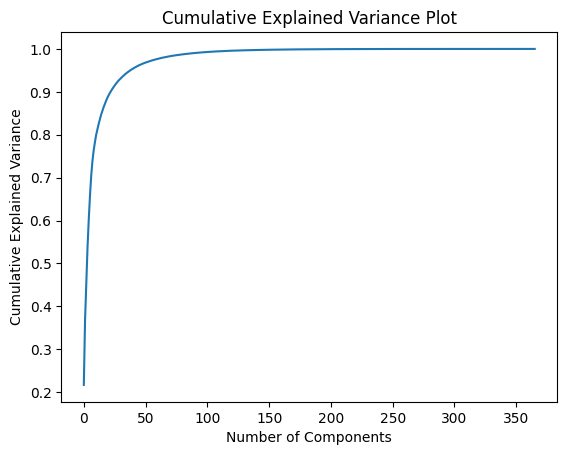

In [51]:
# 2. Eigen Decomposition and Identifying Principal Components

cov_matrix = np.cov(image_standardized, rowvar=False)

eigen_values, eigen_vectors = np.linalg.eig(cov_matrix)

eigen_values = np.real(eigen_values)
eigen_vectors = np.real(eigen_vectors)

sorted_indices = np.argsort(eigen_values)[::-1]
sorted_eigen_values = eigen_values[sorted_indices]
sorted_eigen_vectors = eigen_vectors[:, sorted_indices]

explained_variance = np.cumsum(sorted_eigen_values) / np.sum(sorted_eigen_values)
plt.plot(explained_variance)
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Cumulative Explained Variance Plot')
plt.show()

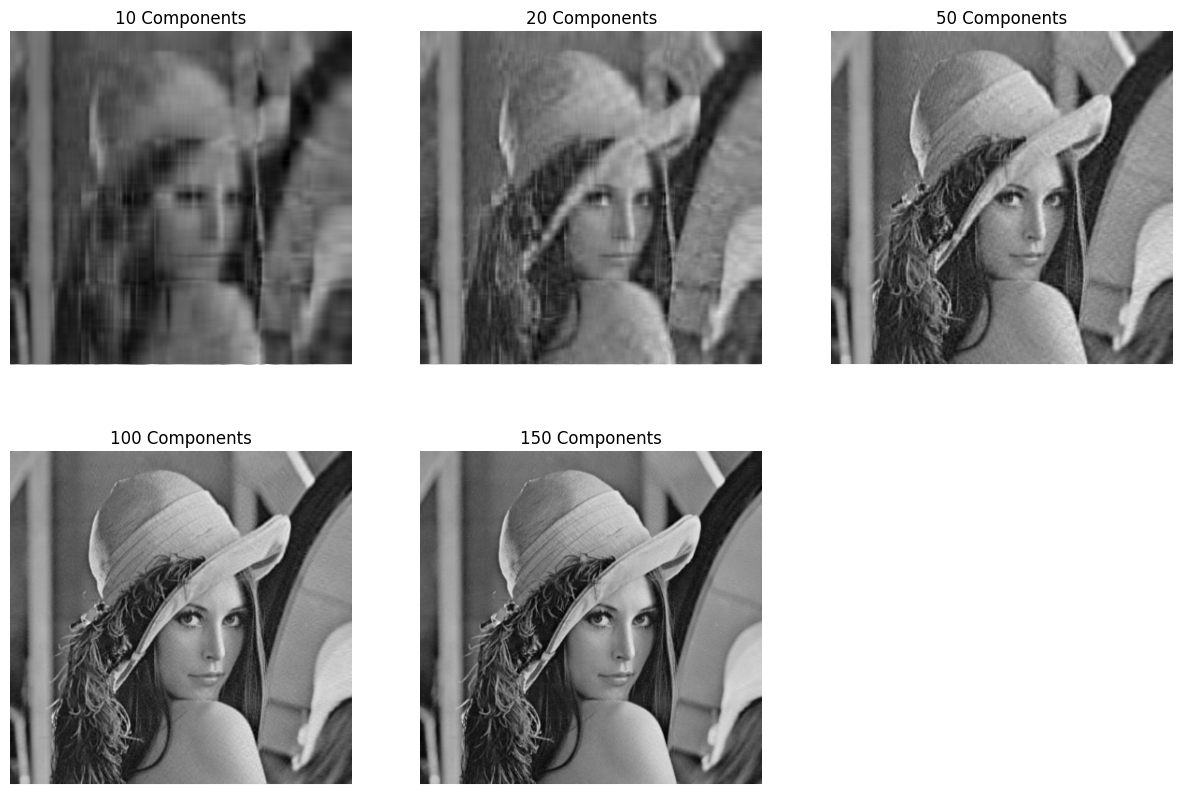

In [52]:
# Function to reconstruct the image using PCA
def reconstruct_image(image_standardized, sorted_eigen_vectors, n_components):

    top_k_eigen_vectors = sorted_eigen_vectors[:, :n_components]

    reduced_data = np.dot(image_standardized, top_k_eigen_vectors)

    reconstructed_data = np.dot(reduced_data, top_k_eigen_vectors.T)

    reconstructed_image = (reconstructed_data * std) + mean

    reconstructed_image = np.real(reconstructed_image)

    return reconstructed_image

components = [10, 20, 50, 100, 150]
plt.figure(figsize=(15, 10))

for i, n in enumerate(components):
    reconstructed_image = reconstruct_image(image_standardized, sorted_eigen_vectors, n)
    plt.subplot(2, 3, i+1)
    plt.imshow(reconstructed_image, cmap='gray')
    plt.axis('off')
    plt.title(f'{n} Components')

plt.show()